CS 200 Final Data Analysis Project
Dataset: Used contraceptive data set from UCI machine learning data repository

Author: Jennifer Senta 

Collaborators: N/A

## Import and Read In Data

In [204]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.ticker as mtick
%matplotlib inline

import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier


from IPython.display import Image

#***************************************************************************
#Note that to get graphviz and pydotplus to work within my Jupyter notebook
#environment, I had to install the packages from Jupyter in every new instance 
#of my Anaconda notebook launch.

#Not sure if that will be needed during grading, but I left it in just in case.
#If needed, remove comment # from following 3 lines
#***************************************************************************

#import sys
#!{sys.executable} -m pip install graphviz
#!{sys.executable} -m pip install pydotplus

import graphviz
import pydotplus




In [116]:
#Set output directory for results, and read in contraceptive data
#This statement for prep work only. Comment out for grading. 
#cdata_orig = pd.read_csv("/Users/jennifersenta/Desktop/BerkeleyClasses/CS200/contraceptive_for_students.csv")

#This read statement for grading. Assumes data file is in same folder as .ipynb
cdata_orig = pd.read_csv("contraceptive_for_students.csv")

#Examine structure of data file
cdata_orig.head()

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


## Begin Exploratory Data Analysis (EDA)

In [77]:
#Check for missing or unreasonable data
#Format as DataFrames so they can be easily read and interpreted

In [78]:
check_nans = pd.DataFrame(np.sum(np.isnan(cdata_orig)), columns=['Count of NaN'])
check_nans

,Count of NaN
wife_age,0
wife_education,0
husband_education,0
num_child,0
wife_religion,0
wife_work,0
husband_occupation,0
standard_living,0
media_exposure,0
contraceptive,0


In [79]:
describe_values = pd.DataFrame(np.round(cdata_orig.describe(),2))
describe_values

,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
count,1473.00,1473.00,1473.00,1473.00,1473.00,1473.00,1473.00,1473.00,1473.00,1473.00
mean,32.54,2.96,3.43,3.26,0.85,0.75,2.14,3.13,0.07,1.92
std,8.23,1.01,0.82,2.36,0.36,0.43,0.86,0.98,0.26,0.88
min,16.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00
25%,26.00,2.00,3.00,1.00,1.00,0.00,1.00,3.00,0.00,1.00
50%,32.00,3.00,4.00,3.00,1.00,1.00,2.00,3.00,0.00,2.00
75%,39.00,4.00,4.00,4.00,1.00,1.00,3.00,4.00,0.00,3.00
max,49.00,4.00,4.00,16.00,1.00,1.00,4.00,4.00,1.00,3.00


Data looks clean and fairly reasonable. The only value I'm not sure of is the max number of children being 16... but I will assume it's correct for these purposes!

In [331]:
#Start by translating numeric categorical variables into more useful names for exploration
#Interpretations based on documentation at https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice
#Numeric variables left as-is for the renaming; husband occupation information described on Piazza via
#publicly available information

#(Note: This is just for exploration. Will we standardize and one-hot-encode variables later.)

cdata = cdata_orig.copy()
cdata['wife_religion'] = ['Islam' if x ==1 else 'Non-Islam' for x in cdata['wife_religion']] 
cdata['contraceptive'] = ['No-use' if x ==1 else 'Long-Term' if x==2 else 'Short-Term' for x in cdata['contraceptive']] 
cdata['wife_education'] = ['low' if x ==1 else 'med-low' if x==2 else 'med-high' if x==3 else 'high' for x in cdata['wife_education']] 
cdata['husband_education'] = ['low' if x ==1 else 'med-low' if x==2 else 'med-high' if x==3 else 'high' for x in cdata['husband_education']] 
cdata['wife_work'] = ['Non-working' if x ==1 else 'Working' for x in cdata['wife_work']] 
cdata['standard_living'] = ['low' if x ==1 else 'med-low' if x==2 else 'med-high' if x==3 else 'high' for x in cdata['standard_living']] 
cdata['media_exposure'] = ['Not-good' if x ==1 else 'Good' for x in cdata['media_exposure']] 
cdata['husband_occupation'] = ['professional' if x ==1 else 'sales' if x==2 else 'manual' if x==3 else 'agriculture' for x in cdata['husband_occupation']] 
cdata.head()


,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,med-low,med-high,3,Islam,Non-working,sales,med-high,Good,No-use
1,45,low,med-high,10,Islam,Non-working,manual,high,Good,No-use
2,43,med-low,med-high,7,Islam,Non-working,manual,high,Good,No-use
3,42,med-high,med-low,9,Islam,Non-working,manual,med-high,Good,No-use
4,36,med-high,med-high,8,Islam,Non-working,manual,med-low,Good,No-use


Text(0.5, 1.0, 'Distribution of % Religious \nAmong Contraceptive Categories\n')

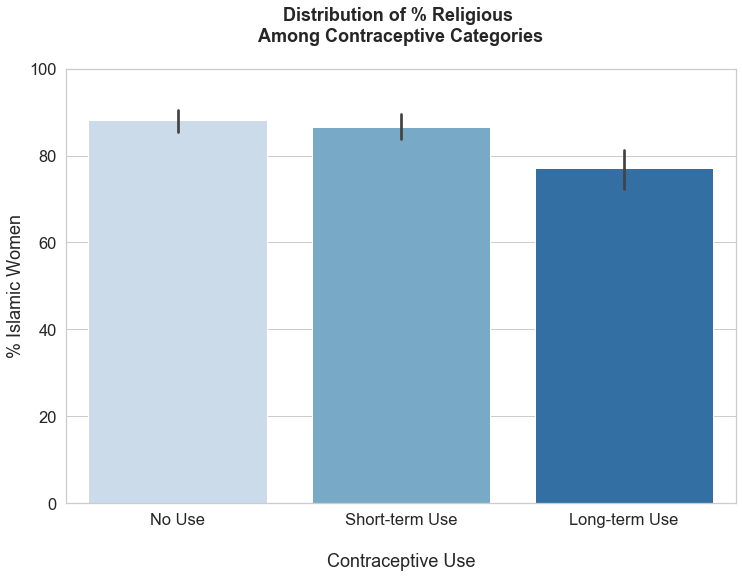

In [16]:
#First, I would like to know if there is a relationship between wife religion and contraceptive use
#I will use the numeric indicators in the **original** data for this plot

plt.figure(figsize=(12,8))
g = sns.barplot(x='contraceptive', y='wife_religion', data=cdata_orig, estimator=lambda x: sum(x==1)*100.0/len(x), 
                palette="Blues", order=[1,3,2])
g.set(xticklabels=['No Use','Short-term Use','Long-term Use'])
plt.xlabel('\nContraceptive Use')
plt.ylabel('% Islamic Women')
plt.ylim(0,100)
plt.title('Distribution of % Religious \nAmong Contraceptive Categories\n', fontweight='bold')

#This plot shows us that there is likely a relationship between religion and contraceptive use, as the percentage
#of women in the Long Term Contraceptive Use category who are Islamic is significantly lower than the percentage 
#of Islamic women in the other two categories. However, this relationship is not as strong as I thought it might be!
#This will be a good feature to test for classification.

[[Text(0, 0, 'Non-Islam'), Text(0, 0, 'Islam')]]

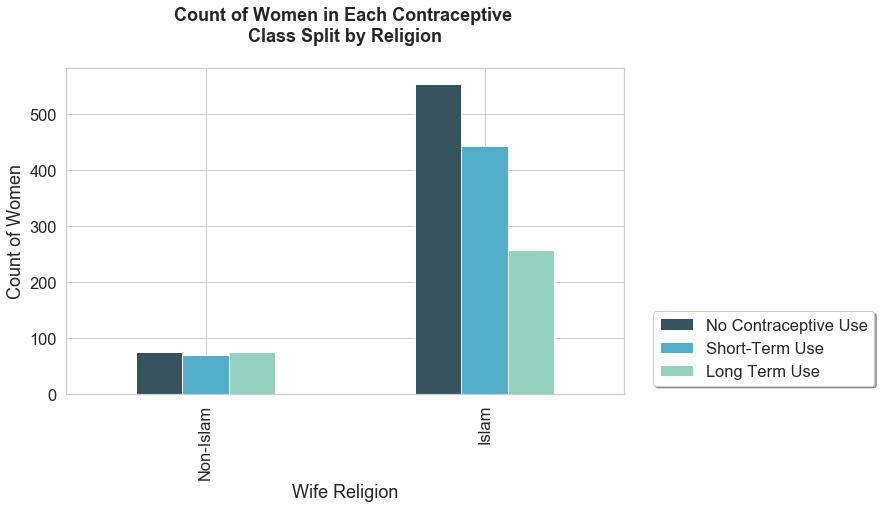

In [17]:
#Here is an alternate visualization of the same data, to provide more insight into the
#fact that non-Islamic counts do not really change across contraceptive use category

pivot_religion = pd.pivot_table(cdata_orig,index=['wife_religion'], columns=['contraceptive'], aggfunc='size', fill_value=0)
ax = pivot_religion[[1, 3,2]].plot(kind='bar', stacked=False,
            colormap=ListedColormap(sns.color_palette("GnBu_d")),figsize=(10,6))
plt.legend(loc='lower center', bbox_to_anchor=(1.25, 0), shadow=True, ncol=1, 
           labels=['No Contraceptive Use','Short-Term Use','Long Term Use'])
plt.title('Count of Women in Each Contraceptive \nClass Split by Religion\n', fontweight='bold')
plt.ylabel('Count of Women')
plt.xlabel('Wife Religion')
ax.set(xticklabels=['Non-Islam','Islam'])


Text(0.5, 1.0, 'Distribution of Number of Children \nby Wife Education Levels\n')

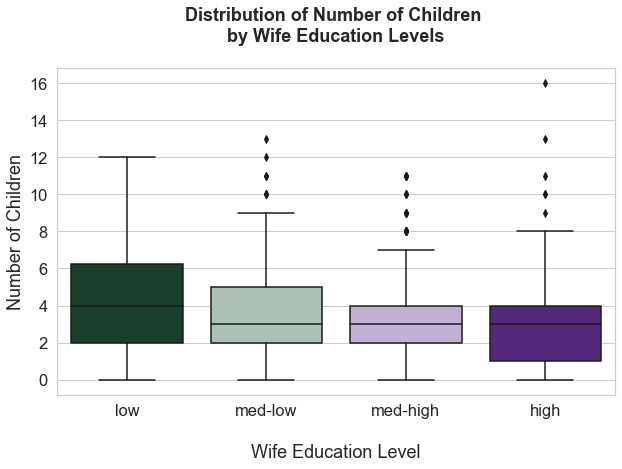

In [18]:
#Next, I would like to know if there is a relationship between a woman's level of
#education and the number of children she has. I will use my **renamed** data for this plot.

plt.figure(figsize = (10,6))
sns.boxplot(x='wife_education', y='num_child', data=cdata, order=['low','med-low','med-high','high'],
            palette = sns.diverging_palette(145, 280, s=85, l=25, n=4))
plt.xlabel('\nWife Education Level')
plt.ylabel('Number of Children')
plt.title('Distribution of Number of Children \nby Wife Education Levels\n', fontweight='bold')

#This plot is interesting! I don't see quite as strong a relationship as I expected to see in decreasing numbers of
#children associated with increasing levels of education. It does look like the overall number of children tends 
#to decrease as education increases, but the differences may or may not be significant. 

#It's also very interesting to observe that the outlier of 16 children occurs in the highest education level bracket!
#I'll try the same plot by Husband Education Levels and see if that looks different.

Text(0.5, 1.0, 'Distribution of Number of Children \nby Husband Education Levels\n')

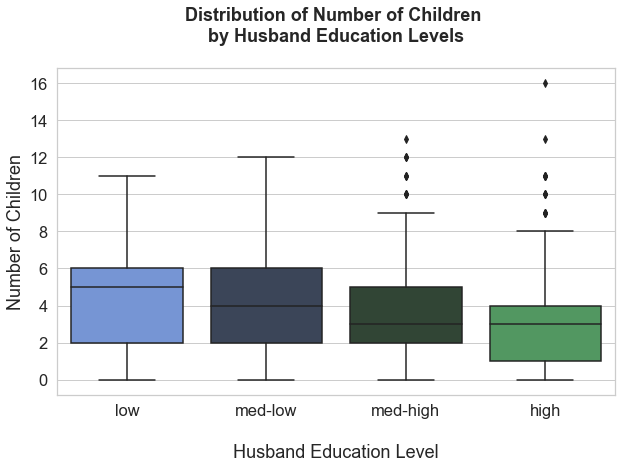

In [19]:
#Look at number of children by husband's education level

plt.figure(figsize = (10,6))
sns.boxplot(x='husband_education', y='num_child', data=cdata, order=['low','med-low','med-high','high'],
            palette = sns.diverging_palette(255, 133, l=60, n=4, center="dark"))
plt.xlabel('\nHusband Education Level')
plt.ylabel('Number of Children')
plt.title('Distribution of Number of Children \nby Husband Education Levels\n', fontweight='bold')

#This plot is also interesting, as there is a pattern of decreasing median number of children by husband
#education level increases. 
#Also, note that the outlier of 16 children also occurs in the highest level of husband education!
#So the couple who had 16 children (if this is a legitimate data point) were both highly educated.
#These plots lead to another data-exploration question; does education level relate to use of birth control?


In [20]:
#To vizualize whether wife education relates to contraceptive use, I first
#need to calculate the appropriate percentages
#I will use the **original** data for this analysis

pivot_wife_edu = pd.pivot_table(cdata_orig,index=['wife_education'], columns=['contraceptive'], aggfunc='size', fill_value=0)
pivot_wife_edu['Percent_1'] = (pivot_wife_edu[1] / (pivot_wife_edu[1] + pivot_wife_edu[2] + pivot_wife_edu[3]))*100
pivot_wife_edu['Percent_2'] = (pivot_wife_edu[2] / (pivot_wife_edu[1] + pivot_wife_edu[2] + pivot_wife_edu[3]))*100
pivot_wife_edu['Percent_3'] = (pivot_wife_edu[3] / (pivot_wife_edu[1] + pivot_wife_edu[2] + pivot_wife_edu[3]))*100
pivot_wife_edu['VerifyTotal'] = pivot_wife_edu['Percent_1'] + pivot_wife_edu['Percent_2'] + pivot_wife_edu['Percent_3']

pivot_wife_edu


contraceptive,1,2,3,Percent_1,Percent_2,Percent_3,VerifyTotal
wife_education,,,,,,,
1,103,9,40,67.763158,5.921053,26.315789,100.0
2,176,37,121,52.694611,11.077844,36.227545,100.0
3,175,80,155,42.682927,19.512195,37.804878,100.0
4,175,207,195,30.329289,35.875217,33.795494,100.0


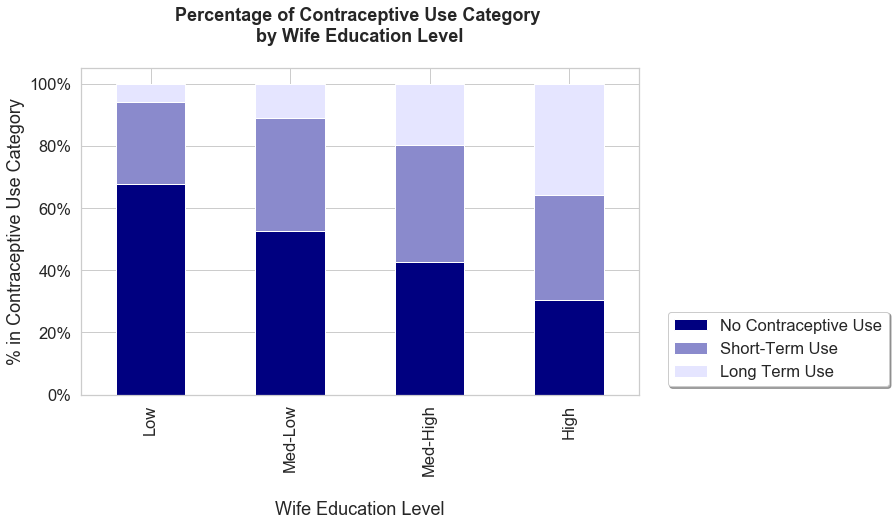

In [21]:
#Next, visualize the relative percentages of each education level who use the various
#contraceptive approaches
ax = pivot_wife_edu[['Percent_1', 'Percent_3','Percent_2']].plot(kind='bar', stacked=True,
            colormap=ListedColormap(sns.light_palette("navy", reverse=True)),figsize=(10,6))
plt.legend(loc='lower center', bbox_to_anchor=(1.25, 0), shadow=True, ncol=1, 
           labels=['No Contraceptive Use','Short-Term Use','Long Term Use'])
plt.title('Percentage of Contraceptive Use Category \nby Wife Education Level\n', fontweight='bold')  
plt.xlabel('\nWife Education Level')
plt.xticks(range(0,4),['Low','Med-Low','Med-High','High'])
plt.ylabel('% in Contraceptive Use Category')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())                                                                                       
                                                                                       

Text(0.5, 1, 'Relationship Between Wife Age \nand Number of Children\n\n\n\n\n\n\n')

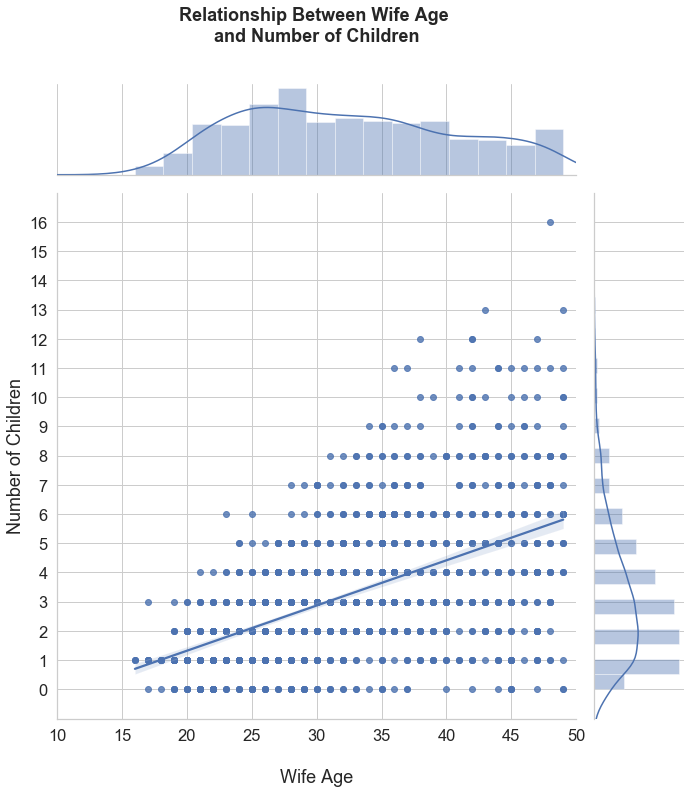

In [22]:
#Investigate the relationship between wife age and number of children
#As expected, older women have had more time to have children, so there is a 
#positive correlation here
#I will use the **renamed** data for this plot

sns.jointplot(x='wife_age',y='num_child', data=cdata, kind="reg", height=10)
plt.ylim(-1,17)
plt.yticks(range(0,17,1))
plt.xlim(10,50)
plt.xlabel('\nWife Age')
plt.ylabel('Number of Children')
plt.title('Relationship Between Wife Age \nand Number of Children\n\n\n\n\n\n\n', fontweight='bold')


Text(0.5, 0, 'Wife Age')

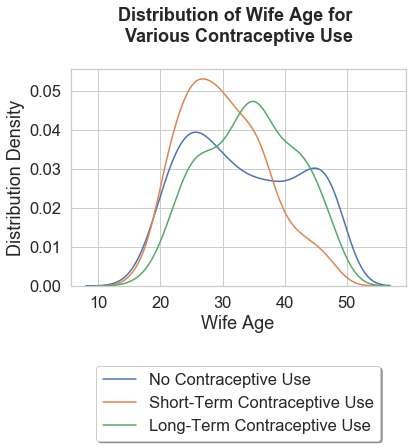

In [23]:
#Visualize the distribution of each contraceptive use category across wife age
#This plot is very interesting, and shows that the distributions of the contraceptive
#categories do vary quite a bit. 
#Wife age will be an important addition to our classifier.
#I will use the **original** data for this plot

nouse = cdata_orig[cdata_orig['contraceptive']==1]
shorttermuse = cdata_orig[cdata_orig['contraceptive']==3]
longtermuse = cdata_orig[cdata_orig['contraceptive']==2]
sns.distplot(nouse.wife_age, hist=False, label='No Contraceptive Use')
sns.distplot(shorttermuse.wife_age, hist=False, label='Short-Term Contraceptive Use')
sns.distplot(longtermuse.wife_age, hist=False, label='Long-Term Contraceptive Use')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.75), shadow=True, ncol=1)
plt.title('Distribution of Wife Age for \nVarious Contraceptive Use\n', fontweight='bold')
plt.ylabel('Distribution Density')
plt.xlabel('Wife Age')

## Feature Engineering, One-Hot Encoding 

In [368]:
#Before modeling: 
#First, split the data into a training set (75% of data) and testing set (25% of data)
#Use random state = 100 for replicability
#All feature engineering and standardization will be done on the training and testing data

cdata_train, cdata_test = train_test_split(cdata, test_size=0.25, random_state=100)

In [25]:
#We will start with a one-vs-rest logistic regression classifier to see if we can predict
#contraceptive use category

#Define model

logistic_regression_model = LogisticRegression(multi_class='ovr')

In [26]:
#Add a function that will one hot encode our categorical features as we add them in our 
#classification training

def OHE_Feature(data, datafeature):
    """
    One-hot-encodes any feature from data.  Adds OHE columns to data.
    """
    vec_enc = DictVectorizer()
    vec_enc.fit(data[[datafeature]].to_dict(orient='records'))
    feature_data = vec_enc.transform(data[[datafeature]].to_dict(orient='records')).toarray()
    feature_cats = vec_enc.get_feature_names()
    features = pd.DataFrame(feature_data, columns=feature_cats)
    data = pd.concat([data, features], axis=1)
    data = data.drop(columns=feature_cats[0])
    return data

In [27]:
#Add a function that will standardize any numeric variables as needed during data processing

def ScaleVariables(data, variables):
    ''' Standardizes each numeric variable listed, and drops non-standardized field'''
    scaler = StandardScaler()
    for i in range(len(variables)):
        standardized_data = scaler.fit_transform(np.array(data[[variables[i]]]).reshape(-1, 1))
        standardized_name = []
        standardized_name.append(variables[i]+'_z')
        standardized = pd.DataFrame(standardized_data, columns=standardized_name)
        data = pd.concat([data, standardized], axis=1)
        data = data.drop(columns=variables[i])
    return data

## Train Classifier and Assess Accuracy

In [369]:
#First attempt at one-vs-all logistic regression with a few key features from the data
#One hot encode wife education, husband education, and wife religion, all of which are categorical

cdata_train = OHE_Feature(cdata_train.reset_index(drop=True), 'wife_education')
cdata_train = OHE_Feature(cdata_train, 'husband_education')
cdata_train = OHE_Feature(cdata_train, 'wife_religion')
cdata_train_attempt1 = cdata_train.drop(list(cdata.columns[cdata.columns!='contraceptive']),axis=1)
print(cdata_train_attempt1.shape)
cdata_train_attempt1.head()

(1104, 8)


,contraceptive,wife_education=low,wife_education=med-high,wife_education=med-low,husband_education=low,husband_education=med-high,husband_education=med-low,wife_religion=Non-Islam
0,No-use,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,Short-Term,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Short-Term,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,No-use,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,No-use,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [370]:
#Train logistic classifier using first attempt training data and assess training accuracy
x_train1 = cdata_train_attempt1.drop('contraceptive',axis=1)
y_train1 = cdata_train_attempt1['contraceptive']
logistic_regression_model.fit(x_train1,y_train1 )


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [371]:
lr_training_accuracy = logistic_regression_model.score(x_train1, y_train1)
lr_training_accuracy

#Training accuracy of 47%, not great but not terrible given there are three categories

0.47192028985507245

In [372]:
#Try adding one hot encoded wife work status to data for second attempt 
cdata_train = OHE_Feature(cdata_train, 'wife_work')
cdata_train_attempt2 = cdata_train.drop(list(cdata.columns[cdata.columns!='contraceptive']),axis=1)
print(cdata_train_attempt2.shape)
cdata_train_attempt2.head()

(1104, 9)


,contraceptive,wife_education=low,wife_education=med-high,wife_education=med-low,husband_education=low,husband_education=med-high,husband_education=med-low,wife_religion=Non-Islam,wife_work=Working
0,No-use,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,Short-Term,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,Short-Term,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,No-use,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,No-use,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [373]:
#Re-fit classifier with new training data and assess training accuracy
x_train2 = cdata_train_attempt2.drop('contraceptive',axis=1)
y_train2 = cdata_train_attempt2['contraceptive']
logistic_regression_model.fit(x_train2, y_train2)
lr_training_accuracy = logistic_regression_model.score(x_train2, y_train2)
print(lr_training_accuracy)

#We can see that this doesn't change our training accuracy much


0.4701086956521739


In [374]:
#Next, I want to try adding number of children and wife age
#Since these are numeric predictors on different scales, I want to start by standardizing each 
#within the training set

drop_list = ["contraceptive","num_child","wife_age"]
cdata_train_attempt3 = cdata_train.drop(cdata.columns.difference(drop_list),axis=1, inplace=False)
print(cdata_train_attempt3.shape)
cdata_train_attempt3.head()

(1104, 11)


,wife_age,num_child,contraceptive,wife_education=low,wife_education=med-high,wife_education=med-low,husband_education=low,husband_education=med-high,husband_education=med-low,wife_religion=Non-Islam,wife_work=Working
0,47,5,No-use,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,30,2,Short-Term,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,26,3,Short-Term,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,42,2,No-use,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,37,1,No-use,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [375]:
#Standardize numeric variables here
cdata_train_attempt3 = ScaleVariables(cdata_train_attempt3,['num_child', 'wife_age'])
print(cdata_train_attempt3.shape)
cdata_train_attempt3.head()

(1104, 11)


,contraceptive,wife_education=low,wife_education=med-high,wife_education=med-low,husband_education=low,husband_education=med-high,husband_education=med-low,wife_religion=Non-Islam,wife_work=Working,num_child_z,wife_age_z
0,No-use,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.757827,1.764304
1,Short-Term,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.518188,-0.285242
2,Short-Term,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.092850,-0.767488
3,No-use,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.518188,1.161497
4,No-use,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.943527,0.558689


In [376]:
#Re-fit classifier and assess training accuracy
x_train3 = cdata_train_attempt3.drop('contraceptive',axis=1)
y_train3 = cdata_train_attempt3['contraceptive']
logistic_regression_model.fit(x_train3, y_train3)
lr_training_accuracy = logistic_regression_model.score(x_train3, y_train3)
print(lr_training_accuracy)

#These additions have definitely improved our training accuracy! Let's try one more version 
#before we cross-validate for robustness against overfitting to our training data

0.519927536231884


In [377]:
#I'd like to add one hot encoded fields media_exposure and standard_living, to assess the 
#impact of these external factors on our classifier
cdata_train = OHE_Feature(cdata_train, 'media_exposure')
cdata_train = OHE_Feature(cdata_train, 'standard_living')
drop_list = ["contraceptive","num_child","wife_age"]
cdata_train_attempt4 = cdata_train.drop(cdata.columns.difference(drop_list),axis=1, inplace=False)
cdata_train_attempt4 = ScaleVariables(cdata_train_attempt4,['num_child', 'wife_age'])
print(cdata_train_attempt4.shape)
cdata_train_attempt4.head()

(1104, 15)


,contraceptive,wife_education=low,wife_education=med-high,wife_education=med-low,husband_education=low,husband_education=med-high,husband_education=med-low,wife_religion=Non-Islam,wife_work=Working,media_exposure=Not-good,standard_living=low,standard_living=med-high,standard_living=med-low,num_child_z,wife_age_z
0,No-use,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.757827,1.764304
1,Short-Term,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.518188,-0.285242
2,Short-Term,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.092850,-0.767488
3,No-use,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.518188,1.161497
4,No-use,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.943527,0.558689


In [378]:
#Re-fit classifier and assess training accuracy
x_train4 = cdata_train_attempt4.drop('contraceptive',axis=1)
y_train4 = cdata_train_attempt4['contraceptive']
logistic_regression_model.fit(x_train4, y_train4)
lr_training_accuracy = logistic_regression_model.score(x_train4, y_train4)
print(lr_training_accuracy)

#This is the best training accuracy we've seen so far, at 54%. We're using pretty much all the 
#data features, so this is probably as good as we can do with the one-vs-all logistic classifier.
#But, are we overfitting our training data? We'll check next with cross-validation

0.5398550724637681


In [379]:
#Finally, add one-hot-encoded husband occupation to assess influence
cdata_train = OHE_Feature(cdata_train, 'husband_occupation')
drop_list = ["contraceptive","num_child","wife_age"]
cdata_train_attempt5 = cdata_train.drop(cdata.columns.difference(drop_list),axis=1, inplace=False)
cdata_train_attempt5 = ScaleVariables(cdata_train_attempt5,['num_child', 'wife_age'])
print(cdata_train_attempt5.shape)
cdata_train_attempt5.head()

(1104, 18)


,contraceptive,wife_education=low,wife_education=med-high,wife_education=med-low,husband_education=low,husband_education=med-high,husband_education=med-low,wife_religion=Non-Islam,wife_work=Working,media_exposure=Not-good,standard_living=low,standard_living=med-high,standard_living=med-low,husband_occupation=manual,husband_occupation=professional,husband_occupation=sales,num_child_z,wife_age_z
0,No-use,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.757827,1.764304
1,Short-Term,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.518188,-0.285242
2,Short-Term,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.092850,-0.767488
3,No-use,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.518188,1.161497
4,No-use,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.943527,0.558689


In [380]:
x_train5 = cdata_train_attempt5.drop('contraceptive',axis=1)
y_train5 = cdata_train_attempt5['contraceptive']
logistic_regression_model.fit(x_train5, y_train5)
lr_training_accuracy = logistic_regression_model.score(x_train5, y_train5)
print(lr_training_accuracy)


0.5507246376811594


## Cross-validate

In [385]:
#Use 5-fold cross-validation to test whether we are over-fitting our data
#Split data into folds starting with the final training data, which was attempt 4 in our case above

from sklearn.model_selection import KFold
from sklearn.base import clone
data_cv = cdata_train_attempt5

def cross_validate_logreg(model):
    model = clone(model)
    five_fold = KFold(n_splits=5)
    accuracy_values = []
    for tr_ind, va_ind in five_fold.split(data_cv):
        model.fit(data_cv.drop('contraceptive',axis=1).iloc[tr_ind,:], data_cv['contraceptive'].iloc[tr_ind])
        accuracy_values.append(model.score(data_cv.drop('contraceptive',axis=1).iloc[tr_ind,:], data_cv['contraceptive'].iloc[tr_ind]))
    return accuracy_values

In [386]:
print('List of training accuracy for each cross-validation fold')
cv_folds = cross_validate_logreg(logistic_regression_model)
print(cv_folds)
print('\nMean cross-validated training accuracy')
cv_folds_mean = np.mean(cross_validate_logreg(logistic_regression_model))
print(cv_folds_mean)

#As we can see, we aren't overfitting the data, since our mean cross-validation training accuracy is
#consistent with our original training accuracy

List of training accuracy for each cross-validation fold
[0.5424688561721405, 0.5503963759909399, 0.535673839184598, 0.5549263873159683, 0.5565610859728507]

Mean cross-validated training accuracy
0.5480053089272994


In [387]:
#listofresults = lr_training_accuracy + cross_validate_logreg(logistic_regression_model) + np.mean(cross_validate_logreg(logistic_regression_model))
accuracy = pd.DataFrame(np.array(cv_folds).reshape(1,5), columns=[1,2,3,4,5])
accuracy['CV_mean'] = cv_folds_mean.astype(float)
accuracy['LogReg'] = lr_training_accuracy.astype(float)
accuracy = accuracy.melt()
accuracy['value'] = accuracy['value']*100
accuracy



,variable,value
0,1,54.246886
1,2,55.039638
2,3,53.567384
3,4,55.492639
4,5,55.656109
5,CV_mean,54.800531
6,LogReg,55.072464


([<matplotlib.axis.XTick at 0x1a22027b90>,
 <a list of 7 Text xticklabel objects>)

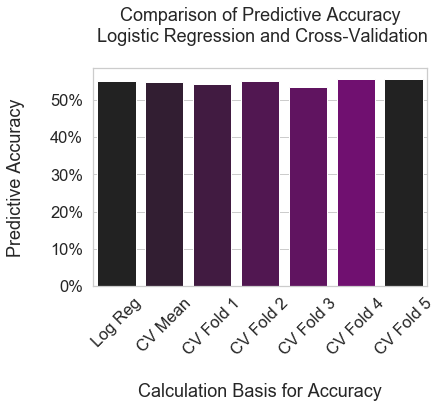

In [388]:
ax = sns.barplot(x='variable', y='value', data=accuracy,
                palette=sns.dark_palette("purple"), order=['LogReg','CV_mean',1,2,3,4,5])
plt.title('Comparison of Predictive Accuracy\n Logistic Regression and Cross-Validation\n')
plt.xlabel('\nCalculation Basis for Accuracy')
plt.ylabel('Predictive Accuracy\n')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())    
plt.xticks(range(0,7),['Log Reg','CV Mean','CV Fold 1','CV Fold 2', 'CV Fold 3', 'CV Fold 4','CV Fold 5'], rotation=45)

## Determine accuracy of prediction using test set

In [383]:
#Finally, perform same data processing on the test set, and assess predictive testing accuracy
cdata_test_final = cdata_test.copy().reset_index(drop=True)
cdata_test_final = OHE_Feature(cdata_test_final.reset_index(drop=True), 'wife_education')
cdata_test_final = OHE_Feature(cdata_test_final, 'husband_education')
cdata_test_final = OHE_Feature(cdata_test_final, 'wife_religion')
cdata_test_final = OHE_Feature(cdata_test_final, 'wife_work')
cdata_test_final = OHE_Feature(cdata_test_final, 'media_exposure')
cdata_test_final = OHE_Feature(cdata_test_final, 'standard_living')
cdata_test_final = OHE_Feature(cdata_test_final, 'husband_occupation')
drop_list = ["contraceptive","num_child","wife_age"]
cdata_test_final = cdata_test_final.drop(cdata.columns.difference(drop_list),axis=1)
cdata_test_final = ScaleVariables(cdata_test_final,['num_child', 'wife_age'])
print(cdata_test_final.shape)
cdata_test_final.head()


(369, 18)


,contraceptive,wife_education=low,wife_education=med-high,wife_education=med-low,husband_education=low,husband_education=med-high,husband_education=med-low,wife_religion=Non-Islam,wife_work=Working,media_exposure=Not-good,standard_living=low,standard_living=med-high,standard_living=med-low,husband_occupation=manual,husband_occupation=professional,husband_occupation=sales,num_child_z,wife_age_z
0,No-use,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.521208,0.493906
1,No-use,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.099792,0.118388
2,Short-Term,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.164455,-0.131957
3,Short-Term,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.007287,-1.884373
4,No-use,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.007287,-0.882993


In [384]:
x_testfinal = cdata_test_final.drop('contraceptive',axis=1)
y_testfinal = cdata_test_final['contraceptive']

logistic_regression_model.fit(x_train5, y_train5)
lr_training_accuracy = logistic_regression_model.score(x_train5, y_train5)
lr_testing_accuracy = logistic_regression_model.score(x_testfinal, y_testfinal )
print('Final training accuracy of logistic classifier')
print(lr_training_accuracy)
print('\nFinal testing accuracy of logistic classifier')
print(lr_testing_accuracy)

#Final testing accuracy isn't great. Could a different type of classifier do better? 

Final training accuracy of logistic classifier
0.5507246376811594

Final testing accuracy of logistic classifier
0.46883468834688347


In [353]:
#Predictions of final trained model on test set
lr_testing_predictions = logistic_regression_model.predict(x_testfinal)

In [355]:
#Examine confusion matrix of classification counts by category
mat = confusion_matrix(lr_testing_predictions, y_testfinal)
mat

#Note: lots of individuals on the off-diagonal indicates that we have pretty big inaccuracies in 
#our classification model (which we already knew given our testing accuracy of less than 50%)
#Let's plot this in a more useful and easy-to-read way.

array([[26, 17, 28],
       [20, 91, 46],
       [35, 50, 56]])

Text(0, 0.5, '\nTrue Contraceptive Use')

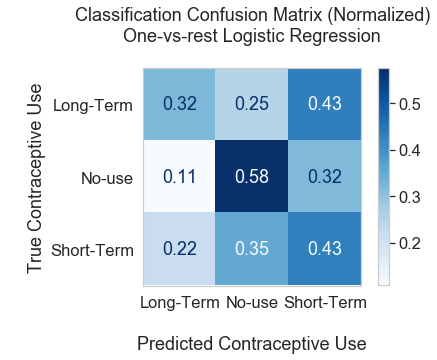

In [356]:
#Plot confusion matrix of how well the logistic regression model classifies our test data
g = plot_confusion_matrix(logistic_regression_model, x_testfinal, 
                                 y_testfinal,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Classification Confusion Matrix (Normalized)\nOne-vs-rest Logistic Regression\n')
plt.grid(b=None)
plt.xlabel('\nPredicted Contraceptive Use')
plt.ylabel('\nTrue Contraceptive Use')


## Random Forest Decision Tree

In [357]:
#Try a random forest decision tree classifier on our final training data to see 
#if this improves our ability to classify

random_forest_model = ensemble.RandomForestClassifier(n_estimators=20, random_state=50)
random_forest_model.fit(x_train5, y_train5)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [358]:
#Check out our random forest model's predictive accuracy on our training data
random_forest_model.score(x_train5, y_train5)

#As expected, it's extremely high! But that is always going to be the case on random forest training
#data sets, since the decision tree is fit very specifically to the training data, and overfits. 

0.9547101449275363

In [360]:
#Check our random forest model's testing accuracy on our held-out test set data
rf_test_accuracy = random_forest_model.score(x_testfinal, y_testfinal)
rf_test_accuracy

#As expected, the testing accuracy of the random forest model isn't nearly as good as the training accuracy 
#since the model overfits. Also, note that even using the same data, the random forest model isn't quite as 
#good as the one-vs-all logistic classifier. 


0.4796747967479675

In [361]:
#Select an estimator from the 20 estimators calculated by sklearn random forest classifier
estimator = random_forest_model.estimators_[10]

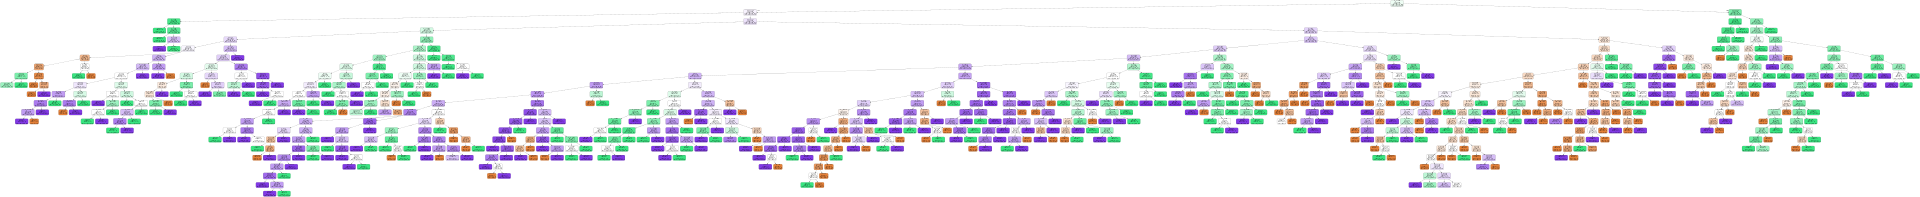

In [362]:
#Just for fun, let's visualize the structure of the random forest model, which is bound to be
#incredibly complex given the number of features we used for our classification predictions!
dot_data = export_graphviz(estimator, out_file=None, 
                      class_names=["No Use", "Long-Term Use", "Short-Term Use"],  
                      filled=True, rounded=True,  
                      special_characters=True)  

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"20,20!"')
#pydot_graph.write_png('JsentaCrazyHugeRandomForest.png')  #Optional code to save as image file
Image(pydot_graph.create_png())


#As expected, the random forest model is incredibly complex. This visual is just nice to give a sense of how 
#complicated a decision tree style model would be with our number of predictive features. It also doubles as 
#a piece of nerdy abstract art. 

## Precision/Recall Curve and Hyperparameters

In [ ]:
#Let's examine the precision and recall of our random forest classifier, to see if
#tuning hyperparameters such as number of estimators or maximum tree depth would help

In [ ]:
#Convert dependent variable classes to binary categories for curve
n_classes = 3
Y_binary_train = label_binarize(y_train5, classes=['No-use','Short-Term','Long-Term'])
Y_binary_test = label_binarize(y_testfinal, classes=['No-use','Short-Term','Long-Term'])


In [365]:
#Create a function to easily re-plot the graph with various hyperparameter values
def PlotPrecisionRecall(n,maxdepth):
    """ Plots the precision-recall of the random forest classifier 
    with specifications passed in n_estimators and max_depth"""
    clf = OneVsRestClassifier(ensemble.RandomForestClassifier(n_estimators=n,max_depth=maxdepth, random_state=50))
    clf.fit(x_train5, Y_binary_train)
    y_score = clf.predict_proba(x_testfinal)

    precision = dict()
    recall = dict()

    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(Y_binary_test[:, i],y_score[:, i])
        plt.plot(recall[i], precision[i], lw=1, label='class {}'.format(i))
    precision["micro"], recall["micro"], _ = precision_recall_curve(Y_binary_test.ravel(),
        y_score.ravel())
    plt.step(recall['micro'], precision['micro'], where='post', lw=3)

    plt.xlabel("\nRecall")
    plt.ylabel("Precision\n")
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.85), shadow=True, ncol=1, labels=['No Use','Short Term','Long Term', 'micro-Averaged'])
    plt.title("Random Forest Classifier Precision vs. Recall Curve\nn= "+str(n)+", max tree depth= "+str(maxdepth)+"\n")
    plt.show()
    
    

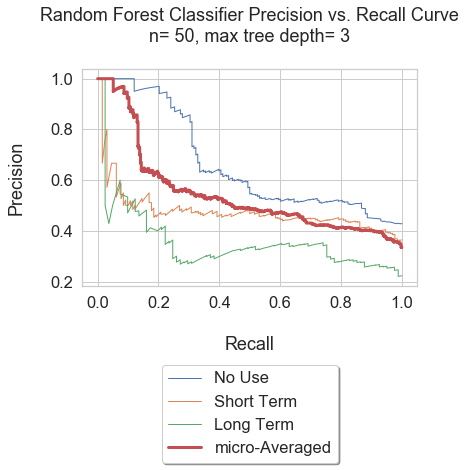

In [366]:
PlotPrecisionRecall(50,3)

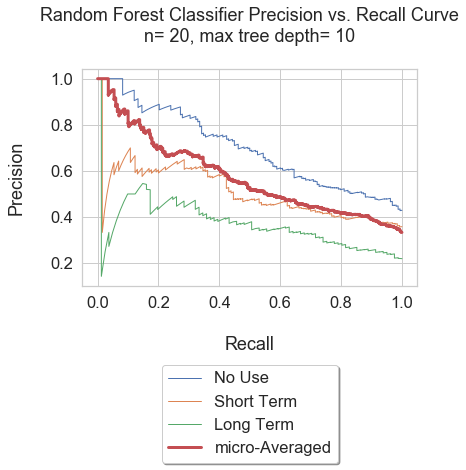

In [367]:
PlotPrecisionRecall(20,10)

In [280]:
#As we can see, this doesn't help our precision/ recall much. 